### This notebook is a test bed for cleaning gw well data from USGS at SB area

In [22]:
import sys
import os
import matplotlib as plt
from matplotlib import *
import matplotlib.pyplot as plt
import glob
import numpy as np
import itertools
import pandas as pd
import datetime
%matplotlib inline

In [2]:
os.chdir('/mnt/c/Users/HCD/UW_work/spatial_algrithom/Data/rain/MC00_GV')

In [3]:
filenames='/mnt/c/Users/HCD/UW_work/spatial_algrithom/Data/rain/MC00_GV'

In [4]:
A=pd.read_csv("MC00_all_daily.csv")

In [5]:
A.head()

,Date,GWR_P,Daymet_P,Prism_P
0,10/1/2000,0.0,0.0,0.0
1,10/2/2000,0.0,0.0,0.0
2,10/3/2000,0.0,0.0,0.0
3,10/4/2000,0.0,0.0,0.0
4,10/5/2000,0.0,0.0,0.0


In [6]:
A['Date'] = pd.to_datetime(A['Date'])

In [7]:
A['year'], A['month'] = A['Date'].dt.year, A['Date'].dt.month

In [8]:
A.head()

,Date,GWR_P,Daymet_P,Prism_P,year,month
0,2000-10-01,0.0,0.0,0.0,2000,10
1,2000-10-02,0.0,0.0,0.0,2000,10
2,2000-10-03,0.0,0.0,0.0,2000,10
3,2000-10-04,0.0,0.0,0.0,2000,10
4,2000-10-05,0.0,0.0,0.0,2000,10


In [40]:
g = A.groupby("month")["GWR_P"].mean().to_frame().reset_index()
g2= A.groupby("month")["Daymet_P"].mean().to_frame().reset_index()
g3= A.groupby("month")["Prism_P"].mean().to_frame().reset_index()

AttributeError: Cannot access callable attribute 'to_frame' of 'SeriesGroupBy' objects, try using the 'apply' method

In [42]:
y=A.groupby("year")["GWR_P"].sum().to_frame().reset_index()
y2= A.groupby("year")["Daymet_P"].sum().to_frame().reset_index()
y3= A.groupby("year")["Prism_P"].sum().to_frame().reset_index()

In [44]:
allok=pd.merge(y, y2, on='year')
allok2=pd.merge(y3, allok,on='year')

In [45]:
print(allok2)

    year      Prism_P       GWR_P     Daymet_P
0   2000   119.138643   89.442723    86.493594
1   2001   917.549274  837.472471   899.783074
2   2002   427.044580  392.629398   442.331539
3   2003   812.694133  456.170585   571.790837
4   2004  1391.465552  650.413439   659.882507
5   2005  1064.992246  889.990468  1002.201950
6   2006   689.727000  506.264375   627.311666
7   2007   282.864950  272.380494   286.801938
8   2008   650.394831  708.730512   650.905158
9   2009   463.549661  435.462696   485.726869
10  2010   903.245687  922.880688   905.894556
11  2011   541.061632  574.728406   551.671032
12  2012   398.649075  469.390475   458.758349
13  2013   134.591927  132.334008   160.494838
14  2014   421.385513  367.619778   421.893674
15  2015   116.812132  128.731496   112.335010


### Group annual bar plot

In [46]:
pos = list(range(len(allok2['GWR_P']))) 
width = 0.25

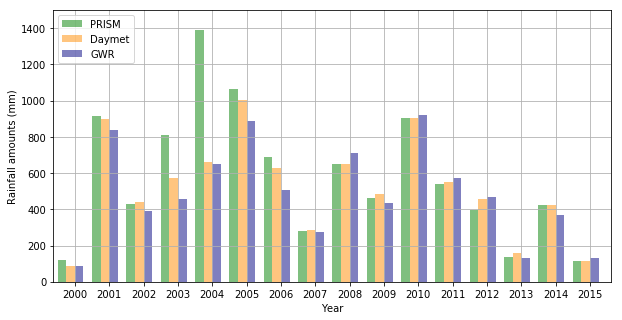

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        #using df['pre_score'] data,
        allok2['Prism_P'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='green', 
        # with label the first value in first_name
        label=allok2['year'][0]) 

plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        allok2['Daymet_P'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='darkorange', 
        # with label the second value in first_name
        label=allok2['year'][1]) 

plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        allok2['GWR_P'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='navy', 
        # with label the third value in first_name
        label=allok2['year'][2])

ax.set_ylabel('Rainfall amounts (mm)')
ax.set_xlabel('Year')

ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(allok2['year'])

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 1500] )

plt.legend(['PRISM', 'Daymet', 'GWR'], loc='upper left')
plt.grid()
plt.show()

### Read all the files in a folder and append it into a large file

In [8]:
files = []
list_of_files = os.listdir(os.getcwd()) #list of files in the current directory
for each_file in list_of_files:
    if each_file.startswith('GV'):  #since its all type str you can simply use startswith
        files.append(each_file)
print(files)

['GV_prism_WY2002_mean.csv', 'GV_prism_WY2003_mean.csv', 'GV_prism_WY2004_mean.csv', 'GV_prism_WY2005_mean.csv', 'GV_prism_WY2006_mean.csv', 'GV_prism_WY2007_mean.csv', 'GV_prism_WY2008_mean.csv', 'GV_prism_WY2009_mean.csv', 'GV_prism_WY2010_mean.csv', 'GV_prism_WY2011_mean.csv', 'GV_prism_WY2012_mean.csv', 'GV_prism_WY2013_mean.csv', 'GV_prism_WY2014_mean.csv', 'GV_prism_WY2015_mean.csv']


In [9]:
combined_csv = pd.concat( [ pd.read_csv(f) for f in files ] )
combined_csv.to_csv( "GV_combined_prism.csv", index=False )

### Read all the files after line 85 from USGS files¶

In [19]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]

In [16]:
fname = '*.txt'

In [28]:
files = glob.glob(fname)
#print(files)
for name in files:
    name2=os.path.splitext(name)[0]+'_new.txt'
    #print(name2)
    with open(name) as f:
        with open(name2,'a') as f2:
            for line in islice(f, 85, None):
                f2.write(line)
                #pass


### Clean the files with inconsistent data (shifted columns)

In [8]:
def coltype(string):
    if(string.count(':') == 1):
        return 0
    if(string=="PDT" or string=="PST"):
        return 1
    if(string.count('.') == 1):
        return 2

In [9]:
filename='/mnt/c/Users/HCD/UW_work/spatial_algrithom/Data/gw_interpolated/USGS_gw/procesed_data/test/USGS_342519119391301.txt'
#filename="USGS_342455119405603.txt"
base=os.path.basename(filename)
split=os.path.splitext(base)

outfile=((split[0])[3:])[:-4]+'.txt'

output_file=open(outfile,'w')
with open(filename) as input_file:
    foundusgs=0
    for line in input_file:
        cols = line.split()
        newline=[]
        foundval=0
        if(cols[0] != "USGS" and foundusgs == 1):
            break
        if(cols[0] == "USGS"):
            foundusgs=1
        else:
            continue
        #print(line)
        for col in cols:
            ctype=coltype(col)
            if(ctype!=0 and ctype!=1):
                newline.append(col)
            if(ctype==2):
                foundval=1
                break
        if(foundval):
            output_file.write(newline[0]+" "+newline[1]+" "+newline[2]+" "+newline[3]+" "+newline[4]+"\n")
output_file.close()


### Get the list of site_ID from the filename

In [3]:
fname = '*.txt'
files = glob.glob(fname)

In [4]:
name2=[]

In [5]:
for name in files:
    base=os.path.basename(name)
    split=os.path.splitext(base)
    name2.append((split[0])[5:])

In [6]:
name2ok=pd.DataFrame(name2)
name2ok.to_csv('gw_well.txt')

### Resample the daily GW values into average monthly step

In [34]:
fname = '*.txt'
allf = glob.glob(fname)

In [35]:
i=1
for file in allf:
    file1 = pd.read_table(file, delim_whitespace=True) #skiprows=[0]
    id='WTD_'+str(i)
    i+=1
    file1.columns=['agency','Site_ID','type','Date',id]
    file1['Date'] = pd.to_datetime(file1['Date'])
    file1ok= file1.set_index(pd.DatetimeIndex(file1['Date']))
    file1okf=file1ok.resample("M", how='mean')
    base=os.path.basename(file)
    split=os.path.splitext(base)
    file1okf.to_csv(split[0]+'_ok.csv')

/home/yingjung_cd/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  # Remove the CWD from sys.path while we load stuff.


### Moving files from folder to another folder

In [37]:
import glob, os, shutil

source_dir = '/mnt/c/Users/HCD/UW_work/spatial_algrithom/Data/gw_interpolated/USGS_gw/procesed_data/raw_text_ok' #Path where your files are at the moment
dst = '/mnt/c/Users/HCD/UW_work/spatial_algrithom/Data/gw_interpolated/USGS_gw/procesed_data/test' #Path you want to move your files to
files = glob.iglob(os.path.join(source_dir, "*.csv"))
for file in files:
    if os.path.isfile(file):
        shutil.move(file, dst)

### Merge all the files based on one column

In [90]:
path = r'/mnt/c/Users/HCD/UW_work/spatial_algrithom/Data/gw_interpolated/USGS_gw/procesed_data' # use your path
                    # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))
lodf = [pd.read_csv(f) for f in all_files]

df = pd.concat([d.set_index('Date') for d in lodf], axis=1).reset_index()
df.drop('Site_ID', axis=1, inplace=True)
df.to_csv("all_test_ok1.csv")

/home/yingjung_cd/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
